In [2]:
import geopandas as pd 
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
# use citibike data 
sept = pd.read_csv('C:/Users/Maria/SkyDrive/Documents/principles of informatics/citibike/201509-citibike-tripdata.csv')
mar = pd.read_csv('C:/Users/Maria/SkyDrive/Documents/principles of informatics/citibike/201503-citibike-tripdata.csv')
sept.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1289699.000000,1289699.000000,1289699.000000,1289699.000000,1289699.000000,1289699.000000,1289699.000000,1289699.000000,1079586.000000,1289699.000000
mean,1050.849829,735.564743,40.735754,-73.988457,729.863430,40.735468,-73.988591,20488.820762,1977.307047,1.044707
std,5256.503969,893.640885,0.021099,0.015389,888.301377,0.021069,0.015404,2992.945077,11.507227,0.609152
min,60.000000,72.000000,40.678907,-74.017134,72.000000,40.678907,-74.017134,14529.000000,1885.000000,0.000000
25%,408.000000,318.000000,40.720798,-73.999318,317.000000,40.720664,-73.999733,17869.000000,1969.000000,1.000000
50%,669.000000,435.000000,40.736502,-73.990026,435.000000,40.736245,-73.990093,21310.000000,1980.000000,1.000000
75%,1130.000000,512.000000,40.750967,-73.979738,510.000000,40.750967,-73.979955,23165.000000,1986.000000,1.000000
max,1794489.000000,3232.000000,40.787209,-73.929891,3232.000000,40.787209,-73.929891,24736.000000,1999.000000,2.000000


In [4]:
# merge two months together
data = pd.concat([sept, mar])
length = len(data)
print length

1631525


In [5]:
# grab first 5,000 rows of data for reasonably sized data set
datashort = data[:5000]
datashort.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4740.000000,5000.000000
mean,720.828800,565.479600,40.737053,-73.988456,554.469000,40.736907,-73.989204,20454.071200,1976.722152,1.139200
std,1188.890779,611.039713,0.019433,0.013737,625.823925,0.020067,0.014898,2918.596775,11.349807,0.476517
min,60.000000,72.000000,40.680011,-74.017134,72.000000,40.679427,-74.017134,14531.000000,1885.000000,0.000000
25%,359.000000,332.000000,40.723684,-73.997203,313.000000,40.721655,-74.001547,17961.000000,1969.000000,1.000000
50%,546.000000,453.000000,40.739445,-73.990026,426.000000,40.740343,-73.989111,21199.000000,1979.000000,1.000000
75%,853.000000,515.000000,40.751581,-73.980544,500.000000,40.753202,-73.977987,23088.250000,1986.000000,1.000000
max,45641.000000,3224.000000,40.771639,-73.935404,3224.000000,40.771639,-73.929891,24353.000000,1999.000000,2.000000


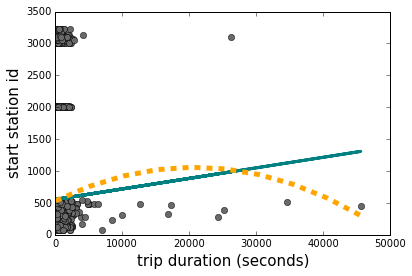

In [15]:
# plot data using gray, orange, and teal for colorblind compliance; also adjusting line types for eaiser readability
pl.plot(datashort.tripduration, datashort['start station id'], 'o', color = 'dimgray') 
pl.xlabel('trip duration (seconds)', fontsize = 15)
pl.ylabel('start station id', fontsize = 15)

LM = sm.OLS(datashort['start station id'], sm.add_constant(datashort.tripduration)).fit()
cm = smf.ols(formula = 'Y ~ I(X) + I((X**2))', data = {'X':datashort.tripduration, 'Y':datashort['start station id']}).fit() 

pl.plot(datashort.tripduration, LM.predict(), '#008080', linewidth = 3)
newX = np.linspace(datashort.tripduration.min(), datashort.tripduration.max(), 10)
pl.plot(newX, cm.params[0]+cm.params[1]*newX+cm.params[2]*newX**2, '--', linewidth = 5, color = 'orange')